In [1]:
import numpy as np

In [2]:
out_f="BINDetect_single_output/bindetect_distances.txt"

In [3]:
distance_mat = np.loadtxt(out_f, delimiter="\t")

In [4]:
names = open(out_f).readlines()[0][1:].split("\t")

In [5]:
#Clustering
import sklearn.preprocessing as preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

In [6]:
linkage_mat = linkage(squareform(distance_mat), "average")

In [7]:
labels = fcluster(linkage_mat, t=0.5, criterion="distance")

Text(0, 0.5, 'Region names')

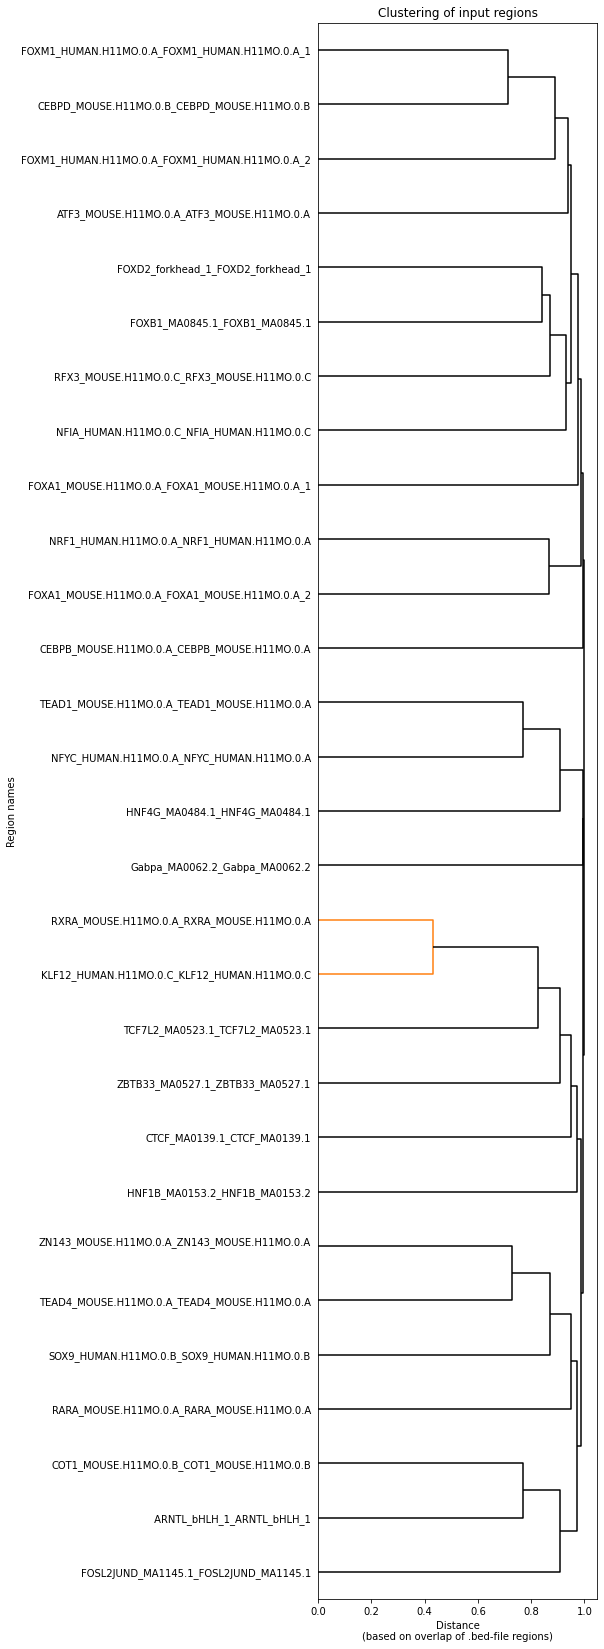

In [8]:
#Plot figure
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, len(names)))
dendro_dat = dendrogram(linkage_mat, 
    labels=names, 
    orientation="right", 
    above_threshold_color="black", 
    )

plt.title("Clustering of input regions")
plt.xlabel("Distance\n(based on overlap of .bed-file regions)")
plt.ylabel("Region names")